In [1]:
!pip install igraph
!pip install import_ipynb


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 9.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 10.8 MB/s 


In [2]:
import networkx as nx
import networkx.algorithms.community as nxcom
import matplotlib.pyplot as plt
import numpy as np
import time as time
from random import uniform, seed
from igraph import *
import copy
import pandas as pd
from matplotlib import figure
import random as rd

In [3]:
import import_ipynb
import Models as models
import pickle
import json

importing Jupyter notebook from Models.ipynb


# CELF

In [6]:
def compute_spread(g,seeds,p=0.5,mc=10):
    spread = []
    for i in range(mc):
        new_active = seeds[:]
        activated_nodes = seeds[:]

        while new_active:
            new_ones = []

            for node in new_active:
                np.random.seed(i)
                success = np.random.uniform(0,1,len(g.neighbors(node,mode="out"))) < p
                new_ones += list(np.extract(success, g.neighbors(node,mode="out")))
            new_active = list(set(new_ones) - set(activated_nodes))
            activated_nodes += new_active
        spread.append(len(activated_nodes))
    return(np.mean(spread))

# default probability is 0.5 and monte carlo is 10
# g is the graph, k is the seed size
# # https://github.com/hautahi/IM_GreedyCELF  
def celf(g,k,p=0.5,mc=10):  
    start_time = time.time() 
    # firt round: find marginal gain for each node
    marg_gain = [compute_spread(g,[node],p,mc) for node in range(g.vcount())]
    Q = sorted(zip(range(g.vcount()),marg_gain), key=lambda x: x[1],reverse=True) # sort Queue in descending order
    seeds, spread, spreads_list = [Q[0][0]], Q[0][1], [Q[0][1]]
    Q, count_of_look_ups, times = Q[1:], [g.vcount()], [time.time()-start_time]
   
    for i in range(k-1):   # k = seed size  
        check  = False
        node_lookup = 0
        while not check:
            node_lookup += 1
            current = Q[0][0]
            Q[0] = (current,compute_spread(g,seeds+[current],p,mc) - spread) # ojnly compute marginal gain for the first node in the queue
            Q = sorted(Q, key = lambda x: x[1], reverse = True)
            check = (Q[0][0] == current)
        spread += Q[0][1]
        seeds.append(Q[0][0])
        spreads_list.append(spread)
        count_of_look_ups.append(node_lookup)
        times.append(time.time() - start_time)
        Q = Q[1:]

    return(seeds,spreads_list,times,count_of_look_ups)

In [33]:
AAAA = Graph.Read_GML('PB2020.gml') # for printing account names

# Independent Cascade

In [8]:
G = nx.read_gml('PB2020.gml')
G = G.reverse()

In [9]:
pb2020 = Graph.from_networkx(G)

In [ ]:
# read from gml
Independent_Cascade = models.Independent_Cascade()
Independent_Cascade.fit(G)

p_Independent_Cascade = Independent_Cascade.probability[Independent_Cascade.probability != 0]
celf_output_Independent_Cascade = celf(pb2020, 20, p = np.mean(p_Independent_Cascade), mc = 100)

In [ ]:
pickle_Independent_Cascade = pickle.dumps(celf_output_Independent_Cascade)

with open('pickle_Independent_Cascade.pickle', 'wb') as handle:
    pickle.dump(pickle_Independent_Cascade, handle)

In [ ]:
with open('Independent_Cascade.json', 'w') as fjson:
    json.dump(celf_output_Independent_Cascade, fjson)

In [ ]:
AAAAA = Graph.Read_GML('PB2020.gml')

In [ ]:
a = []

for i in celf_output_Independent_Cascade[0]:
    print(AAAAA.vs['label'][i])
    a.append(AAAAA.vs['label'][i])

principe_giovan
Premises187
MoralDK
proudboy_
enrique_tarrio
GavinM_ProudBoy
proudboy2012
ProudBoysGBG
ProudBoysUS
ProudBoyzLondon
DetroitProudBoy
Father_Rhyme
ColoradoPOYB
Proudboy13
decentbastards
adamciferri
GregoryKuhnJr1
guns4lyf
ashymadison
usa_chopper


In [ ]:
print("The optimal seed set is: ", celf_output_Independent_Cascade[0])
print("The resulting spread is: ", celf_output_Independent_Cascade[1])
print("The time for each iteration is: ", celf_output_Independent_Cascade[2])
print("The number of times the spread is computed is: ", celf_output_Independent_Cascade[3])

The optimal seed set is:  [1916, 8136, 37, 8051, 7508, 6310, 8068, 7740, 7251, 11887, 1596, 8033, 7157, 1493, 7456, 7240, 0, 27, 19, 8032]
The resulting spread is:  [1137.97, 2104.7, 2446.58, 2669.67, 2813.38, 2942.92, 2997.12, 3029.87, 3059.62, 3088.53, 3115.37, 3136.01, 3148.37, 3157.3, 3162.26, 3165.74, 3168.39, 3170.13, 3171.59, 3173.03]
The time for each iteration is:  [353.96013283729553, 357.03223156929016, 1249.7630233764648, 1286.7884104251862, 1334.817443370819, 1730.576559305191, 6156.150046825409, 7322.482601642609, 7326.096370220184, 7329.7310962677, 7362.500376701355, 7395.648240327835, 7410.599984407425, 7414.392749547958, 7478.138260126114, 7730.668055772781, 7755.647500514984, 8663.508173704147, 8830.539412736893, 9002.90307354927]
The number of times the spread is computed is:  [13217, 1, 349, 12, 14, 98, 990, 226, 1, 1, 9, 9, 4, 1, 17, 66, 4, 142, 26, 27]


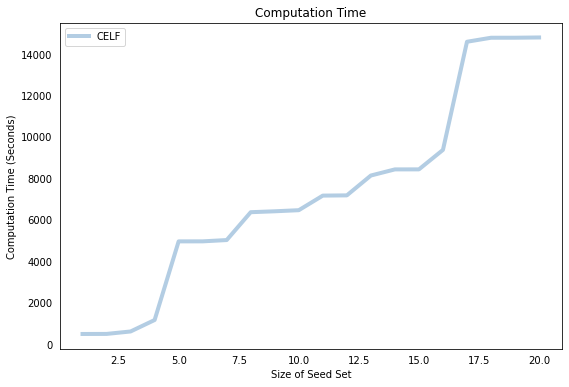

In [ ]:
# Plot settings
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False

# Plot Computation Time
plt.plot(range(1,len(celf_output_Independent_Cascade[2])+1),celf_output_Independent_Cascade[2],label="CELF",color="#B3CDE3")
plt.ylabel('Computation Time (Seconds)'); plt.xlabel('Size of Seed Set')
plt.title('Computation Time'); plt.legend(loc=2)

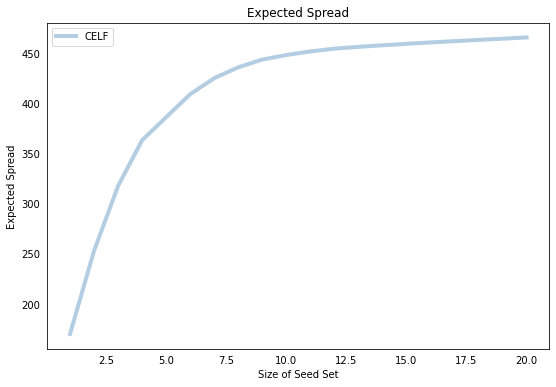

In [ ]:
# Plot Expected Spread by Seed Set Size
plt.plot(range(1,len(celf_output_Independent_Cascade[1])+1),celf_output_Independent_Cascade[1],label="CELF",color="#B3CDE3")
plt.xlabel('Size of Seed Set'); plt.ylabel('Expected Spread')
plt.title('Expected Spread'); plt.legend(loc=2)

# Decreasing Cascade

In [16]:
# read from gml
Decreasing_Cascade = models.Decreasing_Cascade()
Decreasing_Cascade.fit(G)

p_Decreasing_Cascade = Decreasing_Cascade.probability[Decreasing_Cascade.probability != 0]
celf_output_Decreasing_Cascade = celf(pb2020, 20, p = np.mean(p_Decreasing_Cascade), mc = 100)

In [17]:
pickle_Decreasing_Cascade = pickle.dumps(celf_output_Decreasing_Cascade)

with open('pickle_Decreasing_Cascade.pickle', 'wb') as handle:
    pickle.dump(pickle_Decreasing_Cascade, handle)

In [18]:
with open('Decreasing_Cascade.json', 'w') as fjson:
    json.dump(celf_output_Decreasing_Cascade, fjson)

In [34]:
for i in celf_output_Decreasing_Cascade[0]:
    print(AAAA.vs['label'][i])

NameError: ignored

In [20]:
print("The optimal seed set is: ", celf_output_Decreasing_Cascade[0])
print("The resulting spread is: ", celf_output_Decreasing_Cascade[1])
print("The time for each iteration is: ", celf_output_Decreasing_Cascade[2])
print("The number of times the spread is computed is: ", celf_output_Decreasing_Cascade[3])

The optimal seed set is:  [6310, 1916, 1596, 7251, 37, 1493, 7157, 7456, 7508, 8020, 21, 1485, 0, 7154, 6349, 8667, 11989, 8060, 6336, 2074]
The resulting spread is:  [170.2, 253.03, 317.62, 363.09, 386.08, 408.94, 424.89, 435.74, 443.45, 447.95, 451.52, 454.29, 456.1, 457.62, 459.13, 460.5, 461.77, 463.01, 464.23, 465.44]
The time for each iteration is:  [515.0244359970093, 517.8426225185394, 641.6042211055756, 1220.2066597938538, 5177.020837068558, 5177.973946094513, 5243.100147247314, 6642.570923089981, 6687.883443117142, 6743.658916950226, 7469.340130329132, 7481.095819950104, 8481.791491031647, 8789.102011919022, 8790.184591531754, 9761.755005836487, 15178.846940040588, 15383.035708904266, 15384.08792090416, 15397.21490597725]
The number of times the spread is computed is:  [13217, 5, 185, 763, 4546, 1, 66, 1381, 44, 52, 686, 11, 919, 283, 1, 888, 4932, 184, 1, 12]


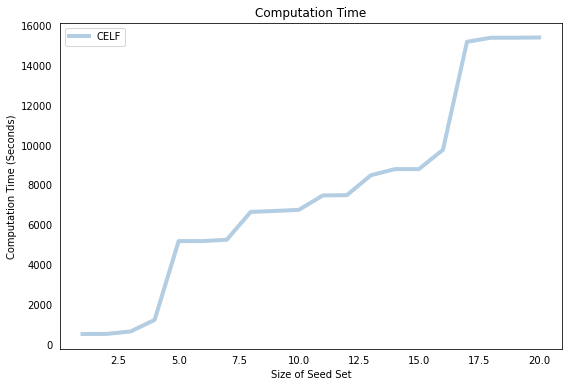

In [21]:
# Plot settings
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False

# Plot Computation Time
plt.plot(range(1,len(celf_output_Decreasing_Cascade[2])+1),celf_output_Decreasing_Cascade[2],label="CELF",color="#B3CDE3")
plt.ylabel('Computation Time (Seconds)'); plt.xlabel('Size of Seed Set')
plt.title('Computation Time'); plt.legend(loc=2)

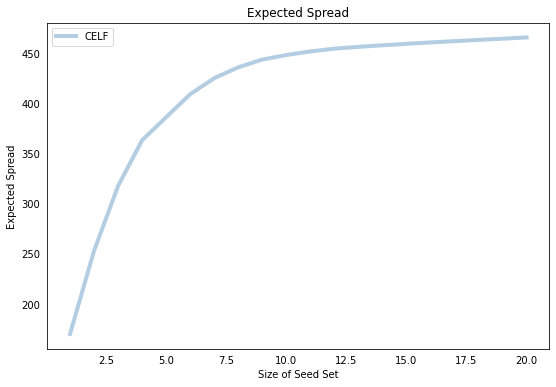

In [22]:
# Plot Expected Spread by Seed Set Size
plt.plot(range(1,len(celf_output_Decreasing_Cascade[1])+1),celf_output_Decreasing_Cascade[1],label="CELF",color="#B3CDE3")
plt.xlabel('Size of Seed Set'); plt.ylabel('Expected Spread')
plt.title('Expected Spread'); plt.legend(loc=2)

# WCM

In [10]:
# read from gml
Weighted_Cascade = models.Weighted_Cascade()
Weighted_Cascade.fit(G)

p_Weighted_Cascade = Weighted_Cascade.probability[Weighted_Cascade.probability != 0]
celf_output_Weighted_Cascade = celf(pb2020, 20, p = np.mean(p_Weighted_Cascade), mc = 100)

In [11]:
pickle_Weighted_Cascade = pickle.dumps(celf_output_Weighted_Cascade)

with open('pickle_Weighted_Cascade.pickle', 'wb') as handle:
    pickle.dump(pickle_Weighted_Cascade, handle)

In [12]:
with open('Weighted_Cascade.json', 'w') as fjson:
    json.dump(celf_output_Weighted_Cascade, fjson)

In [35]:
for i in celf_output_Weighted_Cascade[0]:
    print(AAAA.vs['label'][i])

principe_giovan
Premises187
MoralDK
proudboy_
enrique_tarrio
GavinM_ProudBoy
proudboy2012
ProudBoysGBG
ProudBoysUS
ProudBoyzLondon
DetroitProudBoy
Father_Rhyme
ColoradoPOYB
cckrch
decentbastards
Proudboy13
American_Greg
GregoryKuhnJr1
Sj71Steven
usa_chopper


In [13]:
print("The optimal seed set is: ", celf_output_Weighted_Cascade[0])
print("The resulting spread is: ", celf_output_Weighted_Cascade[1])
print("The time for each iteration is: ", celf_output_Weighted_Cascade[2])
print("The number of times the spread is computed is: ", celf_output_Weighted_Cascade[3])

The optimal seed set is:  [6310, 1916, 1596, 7251, 37, 1493, 7157, 7456, 7508, 8020, 21, 1485, 0, 8675, 6349, 7154, 11242, 11989, 7471, 2074]
The resulting spread is:  [71.85, 115.59, 148.19, 171.6, 185.37, 197.67, 206.17, 212.21, 216.92, 219.7, 222.17, 223.99, 225.48, 226.86, 228.12, 229.37, 230.53, 231.67, 232.81, 233.94]
The time for each iteration is:  [137.845641374588, 138.12411904335022, 138.57750606536865, 138.99254822731018, 140.8390073776245, 142.25314831733704, 435.99164056777954, 2856.5507814884186, 2857.0437366962433, 3642.373048067093, 3665.8117480278015, 3809.8945486545563, 4080.883213043213, 4593.030191421509, 5254.656946659088, 5255.214297771454, 5265.233835697174, 7650.675204515457, 7757.616986274719, 7758.859664440155]
The number of times the spread is computed is:  [13217, 1, 1, 1, 4, 3, 603, 4705, 1, 1433, 41, 255, 484, 912, 1151, 1, 18, 4038, 184, 2]


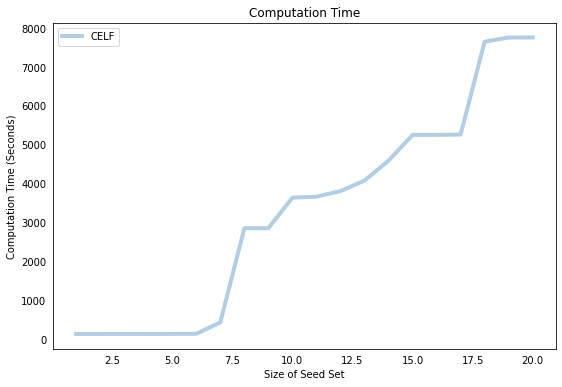

In [14]:
# Plot settings
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False

# Plot Computation Time
plt.plot(range(1,len(celf_output_Weighted_Cascade[2])+1),celf_output_Weighted_Cascade[2],label="CELF",color="#B3CDE3")
plt.ylabel('Computation Time (Seconds)'); plt.xlabel('Size of Seed Set')
plt.title('Computation Time'); plt.legend(loc=2)

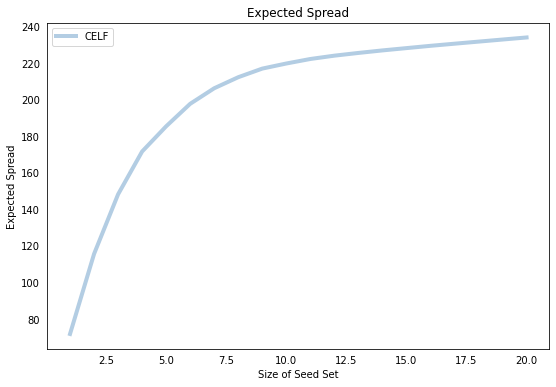

In [15]:
# Plot Expected Spread by Seed Set Size
plt.plot(range(1,len(celf_output_Weighted_Cascade[1])+1),celf_output_Weighted_Cascade[1],label="CELF",color="#B3CDE3")
plt.xlabel('Size of Seed Set'); plt.ylabel('Expected Spread')
plt.title('Expected Spread'); plt.legend(loc=2)

# Trivalency 

In [16]:
# read from gml
Trivalency_Model = models.Trivalency_Model()
Trivalency_Model.fit(G)

p_Trivalency_Model = Trivalency_Model.probability[Trivalency_Model.probability != 0]
celf_output_Trivalency_Model = celf(pb2020, 20, p = np.mean(p_Trivalency_Model), mc = 100)

In [17]:
pickle_Trivalency_Model = pickle.dumps(celf_output_Trivalency_Model)

with open('pickle_Trivalency_Model.pickle', 'wb') as handle:
    pickle.dump(pickle_Trivalency_Model, handle)

In [18]:
with open('Trivalency_Model.json', 'w') as fjson:
    json.dump(celf_output_Trivalency_Model, fjson)

In [36]:
for i in celf_output_Trivalency_Model[0]:
    print(AAAA.vs['label'][i])

principe_giovan
Premises187
MoralDK
proudboy_
enrique_tarrio
GavinM_ProudBoy
proudboy2012
ProudBoysGBG
ProudBoysUS
ProudBoyzLondon
DetroitProudBoy
Father_Rhyme
ColoradoPOYB
cckrch
decentbastards
American_Greg
Proudboy13
guns4lyf
ashymadison
mike29401


In [19]:
print("The optimal seed set is: ", celf_output_Trivalency_Model[0])
print("The resulting spread is: ", celf_output_Trivalency_Model[1])
print("The time for each iteration is: ", celf_output_Trivalency_Model[2])
print("The number of times the spread is computed is: ", celf_output_Trivalency_Model[3])

The optimal seed set is:  [6310, 1916, 1596, 7251, 37, 1493, 7157, 7456, 7508, 8020, 21, 1485, 0, 8675, 6349, 11242, 7154, 8060, 6336, 5]
The resulting spread is:  [23.36, 38.4, 49.62, 58.14, 63.63, 68.33, 71.7, 74.37, 76.6, 78.2, 79.7, 80.94, 82.15, 83.28, 84.37, 85.45, 86.53, 87.59, 88.64, 89.69]
The time for each iteration is:  [43.76752471923828, 43.860724449157715, 43.982332706451416, 44.1362943649292, 44.34457015991211, 44.52149820327759, 44.71859574317932, 45.56133222579956, 45.75854134559631, 173.0706536769867, 173.26326894760132, 1174.8642740249634, 1219.387167930603, 1539.414338350296, 1597.4237504005432, 1911.2873072624207, 1912.0071074962616, 1912.6998236179352, 1976.888543844223, 1979.6347115039825]
The number of times the spread is computed is:  [13217, 1, 1, 1, 1, 1, 1, 4, 1, 606, 1, 4574, 198, 1415, 255, 1378, 3, 3, 265, 11]


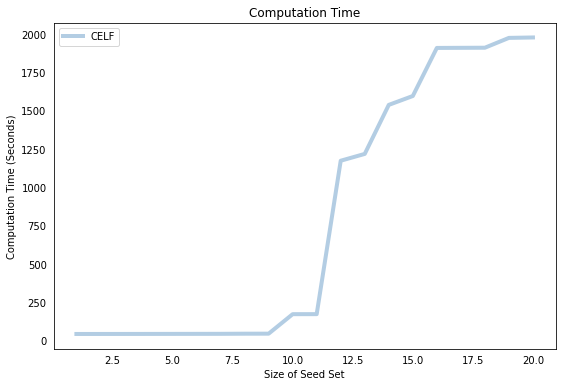

In [20]:
# Plot settings
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False

# Plot Computation Time
plt.plot(range(1,len(celf_output_Trivalency_Model[2])+1),celf_output_Trivalency_Model[2],label="CELF",color="#B3CDE3")
plt.ylabel('Computation Time (Seconds)'); plt.xlabel('Size of Seed Set')
plt.title('Computation Time'); plt.legend(loc=2)

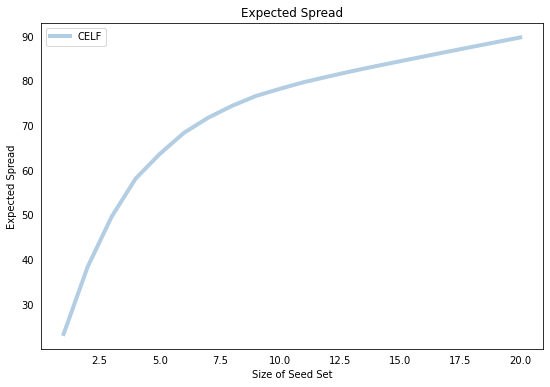

In [21]:
# Plot Expected Spread by Seed Set Size
plt.plot(range(1,len(celf_output_Trivalency_Model[1])+1),celf_output_Trivalency_Model[1],label="CELF",color="#B3CDE3")
plt.xlabel('Size of Seed Set'); plt.ylabel('Expected Spread')
plt.title('Expected Spread'); plt.legend(loc=2)

# Generalized Threshold Mode

In [22]:
general_threshold = models.general_threshold()
general_threshold.fit(G)

p_general_threshold = general_threshold.influence[general_threshold.influence != 0]
celf_output_general_threshold = celf(pb2020, 20, p = np.mean(p_general_threshold), mc = 100)

In [23]:
pickle_general_threshold = pickle.dumps(celf_output_general_threshold)

with open('pickle_general_threshold.pickle', 'wb') as handle:
    pickle.dump(pickle_general_threshold, handle)

In [24]:
with open('general_threshold.json', 'w') as fjson:
    json.dump(celf_output_general_threshold, fjson)

In [37]:
for i in celf_output_general_threshold[0]:
    print(AAAA.vs['label'][i])

principe_giovan
Premises187
MoralDK
proudboy_
enrique_tarrio
GavinM_ProudBoy
proudboy2012
ProudBoysGBG
ProudBoysUS
ProudBoyzLondon
DetroitProudBoy
Father_Rhyme
ColoradoPOYB
cckrch
decentbastards
Proudboy13
American_Greg
GregoryKuhnJr1
Sj71Steven
usa_chopper


In [25]:
print("The optimal seed set is: ", celf_output_general_threshold[0])
print("The resulting spread is: ", celf_output_general_threshold[1])
print("The time for each iteration is: ", celf_output_general_threshold[2])
print("The number of times the spread is computed is: ", celf_output_general_threshold[3])

The optimal seed set is:  [6310, 1916, 1596, 7251, 37, 1493, 7157, 7456, 7508, 8020, 21, 1485, 0, 8675, 6349, 7154, 11242, 11989, 7471, 2074]
The resulting spread is:  [71.85, 115.59, 148.19, 171.6, 185.37, 197.67, 206.17, 212.21, 216.92, 219.7, 222.17, 223.99, 225.48, 226.86, 228.12, 229.37, 230.53, 231.67, 232.81, 233.94]
The time for each iteration is:  [135.77107667922974, 136.08820033073425, 136.4457938671112, 136.86086130142212, 138.65555477142334, 140.15923881530762, 439.13199639320374, 2910.704601049423, 2911.3186736106873, 3706.2139954566956, 3730.6344969272614, 3884.7681634426117, 4180.40248799324, 4725.48167181015, 5404.599050760269, 5405.187263727188, 5415.777118444443, 7823.486579656601, 7935.886960029602, 7937.07158613205]
The number of times the spread is computed is:  [13217, 1, 1, 1, 4, 3, 603, 4705, 1, 1433, 41, 255, 484, 912, 1151, 1, 18, 4038, 184, 2]


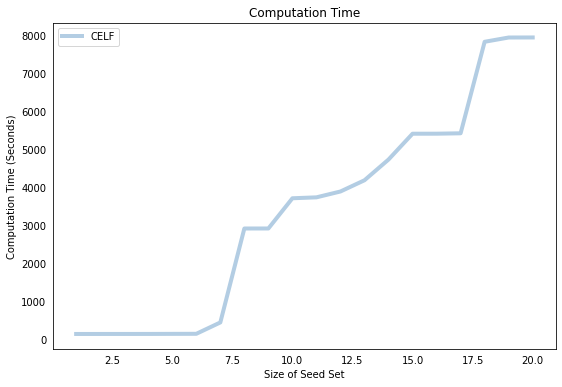

In [26]:
# Plot settings
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False

# Plot Computation Time
plt.plot(range(1,len(celf_output_general_threshold[2])+1),celf_output_general_threshold[2],label="CELF",color="#B3CDE3")
plt.ylabel('Computation Time (Seconds)'); plt.xlabel('Size of Seed Set')
plt.title('Computation Time'); plt.legend(loc=2)

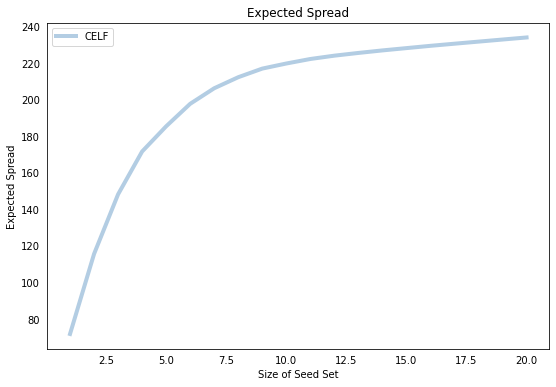

In [27]:
# Plot Expected Spread by Seed Set Size
plt.plot(range(1,len(celf_output_general_threshold[1])+1),celf_output_general_threshold[1],label="CELF",color="#B3CDE3")
plt.xlabel('Size of Seed Set'); plt.ylabel('Expected Spread')
plt.title('Expected Spread'); plt.legend(loc=2)

# Linear Threshold Mode

In [28]:
linear_threshold = models.linear_threshold()
linear_threshold.fit(G)

p_linear_threshold = linear_threshold.influence[linear_threshold.influence != 0]
celf_output_linear_threshold= celf(pb2020, 20, p = np.mean(p_linear_threshold), mc = 100)

In [29]:
pickle_linear_threshold = pickle.dumps(celf_output_linear_threshold)

with open('pickle_linear_threshold.pickle', 'wb') as handle:
    pickle.dump(pickle_linear_threshold, handle)

In [30]:
with open('linear_threshold.json', 'w') as fjson:
    json.dump(celf_output_linear_threshold, fjson)

In [38]:
for i in celf_output_linear_threshold[0]:
    print(AAAA.vs['label'][i])

principe_giovan
Premises187
MoralDK
proudboy_
enrique_tarrio
GavinM_ProudBoy
proudboy2012
ProudBoysGBG
ProudBoysUS
ProudBoyzLondon
DetroitProudBoy
Father_Rhyme
ColoradoPOYB
cckrch
decentbastards
Proudboy13
American_Greg
GregoryKuhnJr1
Sj71Steven
usa_chopper


In [39]:
print("The optimal seed set is: ", celf_output_linear_threshold[0])
print("The resulting spread is: ", celf_output_linear_threshold[1])
print("The time for each iteration is: ", celf_output_linear_threshold[2])
print("The number of times the spread is computed is: ", celf_output_linear_threshold[3])

The optimal seed set is:  [6310, 1916, 1596, 7251, 37, 1493, 7157, 7456, 7508, 8020, 21, 1485, 0, 8675, 6349, 7154, 11242, 11989, 7471, 2074]
The resulting spread is:  [71.85, 115.59, 148.19, 171.6, 185.37, 197.67, 206.17, 212.21, 216.92, 219.7, 222.17, 223.99, 225.48, 226.86, 228.12, 229.37, 230.53, 231.67, 232.81, 233.94]
The time for each iteration is:  [138.00805258750916, 138.25737595558167, 138.62743377685547, 139.09537267684937, 140.81257557868958, 142.31163477897644, 439.15544748306274, 3065.7932596206665, 3066.3842980861664, 3929.1436109542847, 3954.2861065864563, 4114.4750854969025, 4420.145762205124, 4997.603032112122, 5719.003885269165, 5719.654893159866, 5731.181626081467, 8311.753476142883, 8430.57275056839, 8431.860447883606]
The number of times the spread is computed is:  [13217, 1, 1, 1, 4, 3, 603, 4705, 1, 1433, 41, 255, 484, 912, 1151, 1, 18, 4038, 184, 2]


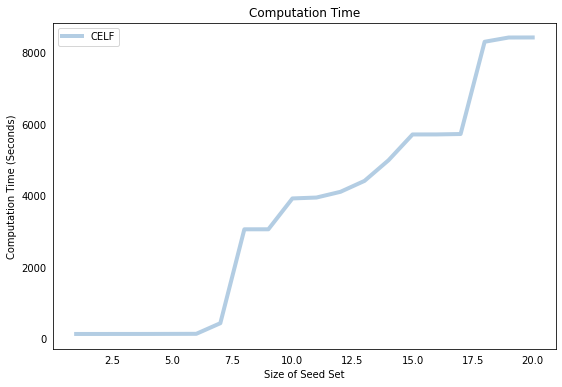

In [31]:
# Plot settings
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False

# Plot Computation Time
plt.plot(range(1,len(celf_output_linear_threshold[2])+1),celf_output_linear_threshold[2],label="CELF",color="#B3CDE3")
plt.ylabel('Computation Time (Seconds)'); plt.xlabel('Size of Seed Set')
plt.title('Computation Time'); plt.legend(loc=2)

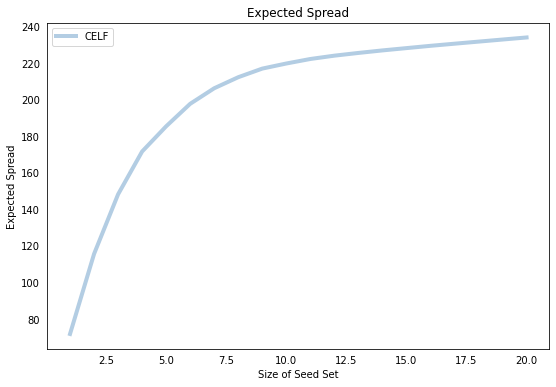

In [32]:
# Plot Expected Spread by Seed Set Size
plt.plot(range(1,len(celf_output_linear_threshold[1])+1),celf_output_linear_threshold[1],label="CELF",color="#B3CDE3")
plt.xlabel('Size of Seed Set'); plt.ylabel('Expected Spread')
plt.title('Expected Spread'); plt.legend(loc=2)